## Importing Packages

In [180]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

%matplotlib inline

## Reading the Datasets

In [181]:
#Reading the datasets
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
conn = sqlite3.connect('im.db')
imdb_movie_basics = pd.read_sql("SELECT * from movie_basics;",conn)
imdb_movie_ratings = pd.read_sql("SELECT * from movie_ratings;",conn)
conn.close()

In [182]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [183]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [184]:
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [185]:
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [186]:
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [187]:
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Joining the Datasets

In [188]:
#Joining the imdb data tables
imdb_movie_basics.set_index('movie_id',inplace=True)
imdb_movie_ratings.set_index('movie_id',inplace=True)
imdb_movie_basic_ratings = imdb_movie_basics.join(imdb_movie_ratings,how='inner')
imdb_movie_basic_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [189]:
#Joining the merged imdb tables with the bom_movie_gross table
bom_movie_gross.set_index('title',inplace=True)
imdb_movie_basic_ratings.set_index('primary_title',inplace=True)
bom_imdb = bom_movie_gross.join(imdb_movie_basic_ratings,how='inner')
bom_imdb.head()

,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


In [190]:
#Reseting the index of the bom_imdb dataframe
bom_imdb = bom_imdb.reset_index()
bom_imdb = bom_imdb.rename(columns={'index':'primary_title'})
bom_imdb.head()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
1,"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
2,10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
3,10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
4,1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


## Data Cleaning

In [191]:
bom_imdb.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,3.005000e+03,3027.000000,3027.000000,2980.000000,3027.000000,3.027000e+03
mean,3.064033e+07,2014.077635,2013.783284,107.217114,6.457582,6.170030e+04
std,6.671629e+07,2.442245,2.466955,20.073886,1.012277,1.255132e+05
min,1.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.390000e+05,2012.000000,2012.000000,94.000000,5.900000,2.117000e+03
50%,2.000000e+06,2014.000000,2014.000000,105.000000,6.600000,1.310900e+04
75%,3.250000e+07,2016.000000,2016.000000,118.000000,7.100000,6.276550e+04
max,7.001000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06


In [192]:
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   original_title   3027 non-null   object 
 6   start_year       3027 non-null   int64  
 7   runtime_minutes  2980 non-null   float64
 8   genres           3020 non-null   object 
 9   averagerating    3027 non-null   float64
 10  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 260.3+ KB


In [193]:
#Checking missing or null values
bom_imdb.isnull().sum()

primary_title         0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

In [194]:
#Checking duplicate values
bom_imdb.duplicated().sum()

0

In [195]:
#Since missing values in foreign_gross are almost more than half we replace with median
#Change the column to float
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].str.replace(',', '').astype(float)
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna(bom_imdb['foreign_gross'].median())

In [196]:
bom_imdb.isnull().sum()

primary_title       0
studio              3
domestic_gross     22
foreign_gross       0
year                0
original_title      0
start_year          0
runtime_minutes    47
genres              7
averagerating       0
numvotes            0
dtype: int64

In [197]:
#Drop all the rows that still contain null values
bom_imdb.dropna(axis=0, inplace =True)

In [198]:
bom_imdb.isnull().sum()

primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [199]:
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    2952 non-null   object 
 1   studio           2952 non-null   object 
 2   domestic_gross   2952 non-null   float64
 3   foreign_gross    2952 non-null   float64
 4   year             2952 non-null   int64  
 5   original_title   2952 non-null   object 
 6   start_year       2952 non-null   int64  
 7   runtime_minutes  2952 non-null   float64
 8   genres           2952 non-null   object 
 9   averagerating    2952 non-null   float64
 10  numvotes         2952 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 276.8+ KB


In [200]:
bom_imdb['domestic_gross_in_million_$'] = bom_imdb['domestic_gross'] / 1e6
bom_imdb['foreign_gross_in_million_$'] = bom_imdb['foreign_gross'] / 1e6
bom_imdb['numvotes'] = bom_imdb['numvotes'].astype(float) 

In [201]:
bom_imdb.drop(labels=['primary_title','studio','domestic_gross','foreign_gross','original_title','year','start_year'], axis=1, inplace=True)
bom_imdb.head()

,runtime_minutes,genres,averagerating,numvotes,domestic_gross_in_million_$,foreign_gross_in_million_$
0,99.0,"Action,Drama,Thriller",7.2,46103.0,1.3000,0.355
1,117.0,"Drama,War",7.1,6848.0,0.0539,21.200
2,103.0,"Drama,Horror,Mystery",7.2,260383.0,72.1000,38.100
3,100.0,"Comedy,Drama,Romance",6.1,22484.0,0.2030,21.200
4,93.0,Drama,6.3,1301.0,0.0110,21.200


In [202]:
bom_imdb.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross_in_million_$,foreign_gross_in_million_$
count,2952.000000,2952.000000,2.952000e+03,2952.000000,2952.000000
mean,107.305894,6.464837,6.319074e+04,30.680274,56.154408
std,20.043335,0.994953,1.267370e+05,67.089697,112.295519
min,3.000000,1.600000,5.000000e+00,0.000100,0.000600
25%,94.000000,5.900000,2.500500e+03,0.136750,14.050000
50%,105.000000,6.600000,1.387750e+04,2.000000,21.200000
75%,118.000000,7.100000,6.666950e+04,32.425000,34.450000
max,272.000000,9.200000,1.841066e+06,700.100000,946.400000


## Data Analysis

In [203]:
cat_cols= bom_imdb.select_dtypes(include=['object']).columns
num_cols = bom_imdb.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['genres'], dtype='object')
Numerical Variables:
['runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross_in_million_$', 'foreign_gross_in_million_$']


runtime_minutes
Skew : 0.64


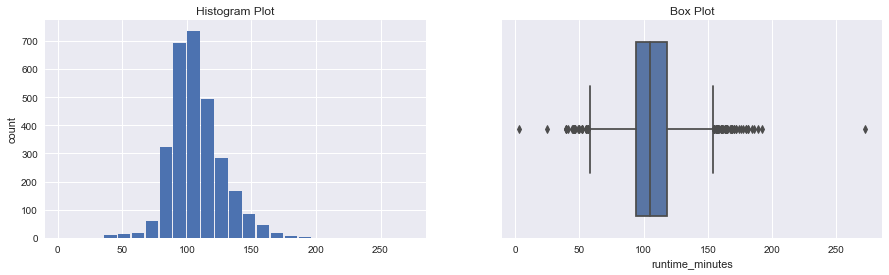

averagerating
Skew : -0.83


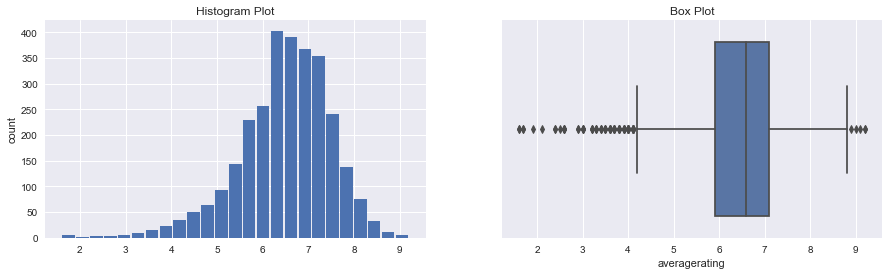

numvotes
Skew : 4.44


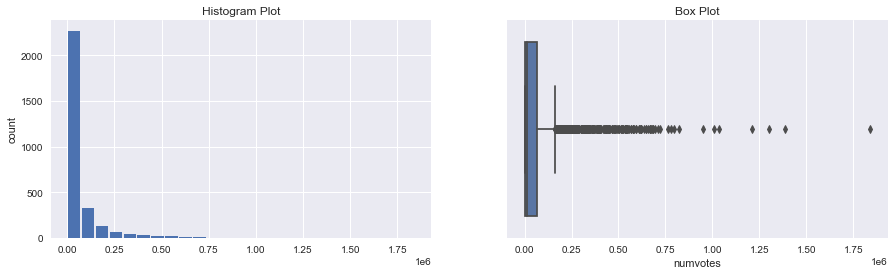

domestic_gross_in_million_$
Skew : 4.15


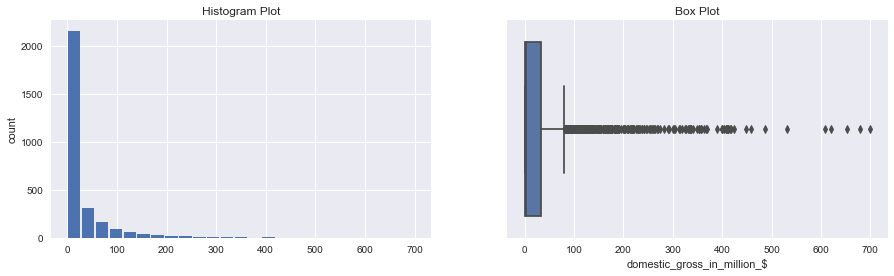

foreign_gross_in_million_$
Skew : 4.04


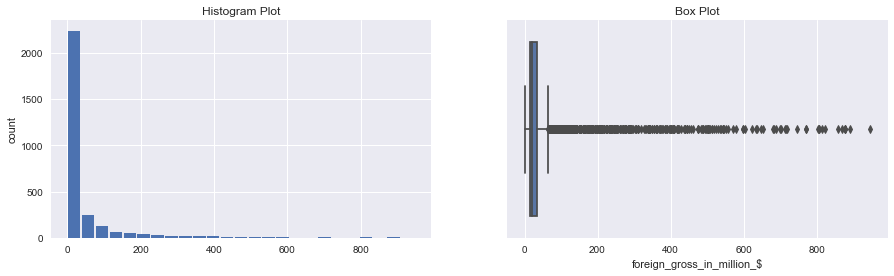

In [204]:
for col in num_cols:
    print(col)
    print('Skew :', round(bom_imdb[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    plt.title('Histogram Plot')
    bom_imdb[col].hist(grid=True,bins=25,rwidth=0.9)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bom_imdb[col])
    plt.title('Box Plot')
    plt.show()

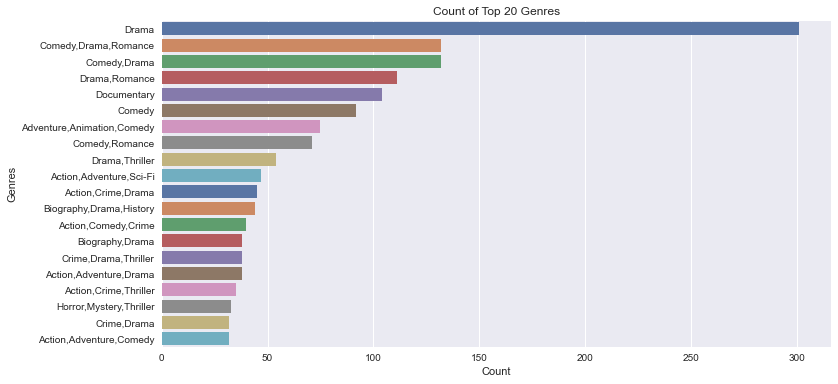

In [205]:
#Count plot for the top 20 genres
top_genres = bom_imdb['genres'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.title('Count of Top 20 Genres')
sns.countplot(y='genres', data=bom_imdb, order=top_genres.index,palette='deep')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()